# Import Libraries

In [160]:
import numpy as np
import pandas as pd
import sklearn as sk
import statistics as st
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Split function

In [161]:
def split(dataset, folds):
	
	return np.array_split(dataset, folds)

# KNN K-fold Cross Validation

In [190]:
def KNN_cross_validation(dataset, folds, K):
    
    # save for best config
    best_acc = 0
    best_config = 0
    best_model = neighbors.KNeighborsClassifier(n_neighbors=1)
    
    # test hyperparameter from 1 to K
    for k in np.arange(1,K):

        model = neighbors.KNeighborsClassifier(n_neighbors=k)
        
        # split data by folds
        data_splited = split(dataset, folds)
        
        for i in range(folds):
            
            acc_l = list()
            # Set validation set
            validation = data_splited[i]

            r = list(range(folds))
            # Exlude the validation set
            r.pop(i)

            # Combine other set as training set
            for j in r:

                if j == r[0] :
                    training = data_splited[j]
                else:
                    training = np.concatenate((training,data_splited[j]), axis=0)

            x_train = training[:,:-1]
            y_train = training[:,-1].astype(int)
            x_test = validation[:,:-1]
            y_test = validation[:,-1].astype(int)

            # fit the training set            
            model.fit(x_train,y_train)
            # predict on the validation set
            pred = model.predict(x_test)
            # calculate the accuracy for the prediction
            acc = np.mean(pred == y_test)
            # add the accuracy of this combination to list
            acc_l.append(acc)

        # find the mean accuracy of hyperparameter K after K-fold cross validation
        acc_m = st.mean(acc_l)
        
        # check if the current set is optimal
        if best_acc < acc_m:
            best_acc = acc_m
            best_config = k
            best_model = model

    return  best_acc, best_config, best_model

# Decisicon Tree K-fold Cross Validation

In [163]:
def DT_cross_validation(dataset, folds, depth):
    
    # save for best config
    best_acc = 0
    best_config = 0
    best_model = DecisionTreeClassifier(max_depth=1)

    for d in np.arange(1,depth):

        model = DecisionTreeClassifier(max_depth=d)
        
        #split data
        data_splited = split(dataset, folds)
        
        for i in range(folds):
            
            acc_l = list()
            # set the validation set
            validation = data_splited[i]

            r = list(range(folds))
            r.pop(i)

            # set the training set
            for j in r:

                if j == r[0] :
                    training = data_splited[j]
                else:
                    training = np.concatenate((training,data_splited[j]), axis=0)
            
            x_train = training[:,:-1]
            y_train = training[:,-1].astype(int)
            x_test = validation[:,:-1]
            y_test = validation[:,-1].astype(int)
        
            # fit the training data to the model
            model.fit(x_train,y_train)
            # predict on validation set
            pred = model.predict(x_test)
            # calculate accuracy of predition on validation set
            acc = np.mean(pred == y_test)
            # add accuracy of this combination to the list
            acc_l.append(acc)

        # find the mean accuracy of hyperparameter K after K-fold cross validation
        acc_m = st.mean(acc_l)

        # check if the current set is optimal
        if best_acc < acc_m:
                best_acc = acc_m
                best_config = d
                best_model = model
    
    return  best_acc, best_config, best_model


# Training Function

In [164]:
def train(dataset, index, indicator, r, folds=5):
    
    # save for best config
    best_acc = 0
    best_config = 0
    best_knn_model= neighbors.KNeighborsClassifier(n_neighbors=1)
    best_dt_model = DecisionTreeClassifier(max_depth=1)
    
    # train for different size of data
    for size in r:
        print('Size of Training Set: ',size)
        # training for the KNN model
        if indicator == 'KNN':
            acc, config, KNN_model = KNN_cross_validation(dataset[:size], folds, index)
            print('KNN: ', acc, config, KNN_model)
            y_test = dataset[size:,-1].astype(int)
            pred = KNN_model.predict(dataset[size:,:-1])
            acc = np.mean(pred == y_test)
            print(acc)

            if best_acc < acc:
                best_acc = acc
                best_config = config
                best_knn_model = KNN_model

        # training for the decision trees model
        if indicator == 'DT':
            acc, config, DT_model = DT_cross_validation(dataset[:size], folds, index)
            print('Decision tree: ',acc, config, DT_model)
            y_test = dataset[size:,-1].astype(int)
            pred = DT_model.predict(dataset[size:,:-1])
            acc = np.mean(pred == y_test)
            print(acc)

            if best_acc < acc:
                best_acc = acc
                best_config = config
                best_dt_model = DT_model

    if indicator == 'KNN':
        return best_acc, best_config, best_knn_model

    if indicator == 'DT':
        return best_acc, best_config, best_dt_model

# Import Dataset 1

In [126]:
# Adult dataset
header = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation',
       'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary']

#convert 
missing_values = [' ?', '?']
data_df = pd.read_csv(r'F:\COMP551\final\Adult Dataset\adult.data',header=None,na_values = missing_values,names = header)
test_df = pd.read_csv(r'F:\COMP551\final\Adult Dataset\adult.test',header = None,na_values = missing_values,names = header)

In [127]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [128]:
#number of rows x number of columns
print('shape:',data_df.shape)
data_df.head()

shape: (32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [129]:
# # Check all entries if there are invalid data
# for col in data_df.columns:
#   if data_df[col].dtype == "object":
#     print('Attribute name:',col)
#     print(data_df[col].value_counts())
#     print('\n')

## Data Cleaning

In [130]:
# Create a copy of the dataframe(checkpoint_1) before dropna
df = data_df.copy(deep = True)

In [131]:
# drop invalid data rows
# ? is already converted to Nan while reading_csv
# df = df.dropna()
# print(df.shape)

# check all is dropped
# null_data = df.iloc[:,:-1]
# null_data.isnull().sum()

## Visualiztion

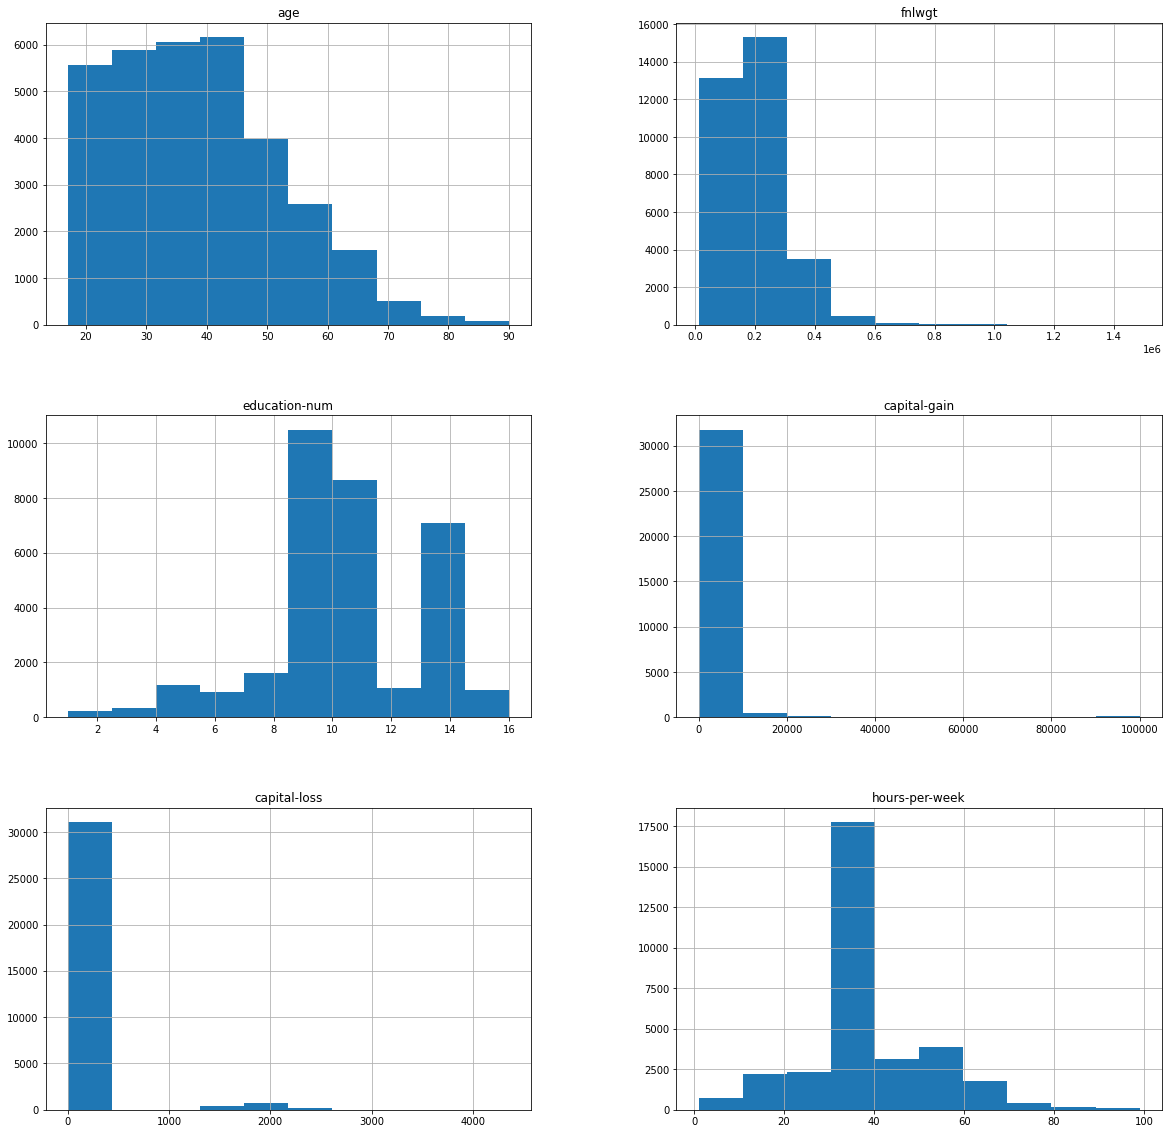

In [132]:
# a histogram display the adult data with 
# y-axis = number of people and
# x-axis = value of feature

p = df.hist(figsize = (20,20))

## Encoding

In [133]:
# Create copies of dataset(checkpoint_2) before conveting 
df_copy = df.copy(deep = True)

In [134]:
# Converting 'sex' and 'salary' to binary

print('sex:\n',df_copy["sex"].value_counts())
print('salary:\n',df_copy["salary"].value_counts())

# Male = 1, Female = 0
df_copy["sex"] = np.where(df.sex == ' Male', 1, 0)
# Salary > 50K = 1, < 50K = 0
df_copy["salary"] = np.where(df.salary == ' >50K', 1 , 0)

sex:
  Male      21790
 Female    10771
Name: sex, dtype: int64
salary:
  <=50K    24720
 >50K      7841
Name: salary, dtype: int64


In [135]:
df_copy.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0


In [136]:
# Since in the previous check, the adult dataset only contains object and int types
# Here we divided our features into two types: categorical features and quantitative features

In [137]:
# Check int data type
int_col= []
for col in df_copy.columns:
    if df_copy[col].dtype == 'int64' or df_copy[col].dtype == 'int32':
        int_col.append(col)
print(int_col)

['age', 'fnlwgt', 'education-num', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'salary']


In [138]:
# Check object data type
obj_col= []
for col in df_copy.columns:
    if df_copy[col].dtype == 'object':
        obj_col.append(col)
print(obj_col)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']


### Categorical Features

#### One Hot Encoding

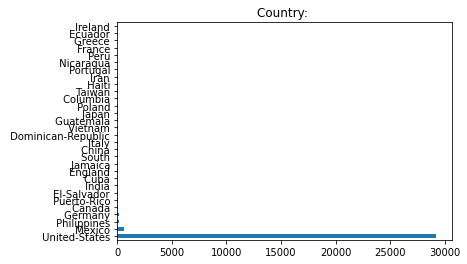

In [139]:
%matplotlib inline

plt.title('Country: ')
(df_copy['native-country']
     .value_counts()
      .head(30)
     .plot(kind='barh'))

plt.show()

In [140]:
# here we can see doing one hot encoding is not a really good idea since most of our data sample are from states

In [141]:
# quantitative_subset = df_copy.select_dtypes('number')
categorical_subset = df_copy.select_dtypes('object')

#hence we drop country col 
categorical_subset_ohe = categorical_subset.drop('native-country',1)

C:\Users\Asteroid\AppData\Local\Temp/ipykernel_4052/754396768.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  categorical_subset_ohe = categorical_subset.drop('native-country',1)


In [142]:
categorical_subset_ohe.head()

,workclass,education,marital-status,occupation,relationship,race
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black


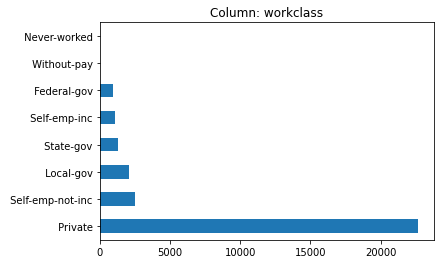

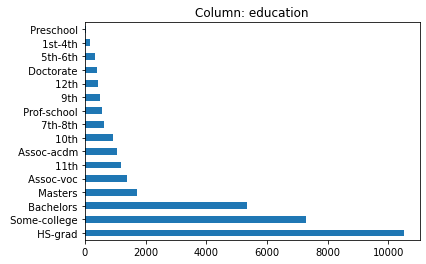

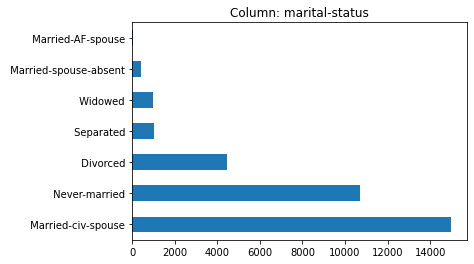

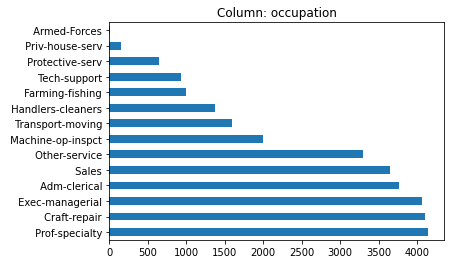

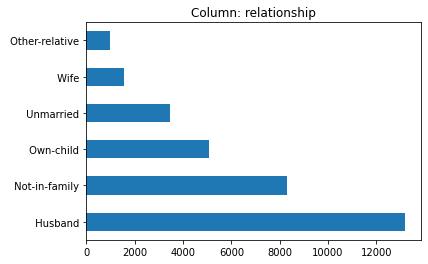

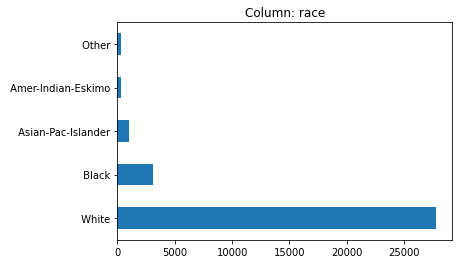

In [143]:
for idx, colname in enumerate(categorical_subset_ohe):
    
    #since age and wl
    plt.title('Column: ' + colname)
    (df_copy[colname]
        .value_counts()
        .head(30)
        .plot(kind='barh'))

    plt.show()

In [144]:
# check and we are good 
categorical_subset_ohe = pd.get_dummies(categorical_subset_ohe[categorical_subset_ohe.columns])
categorical_subset_ohe.head()

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


#### Ordinal Encoding

In [145]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

categorical_subset_ord = categorical_subset.copy(True)

for col in categorical_subset_ord.columns[:]:
    if categorical_subset_ord[col].dtype == "object":
        categorical_subset_ord[col] = ord_enc.fit_transform(categorical_subset_ord[[col]])
        
categorical_subset_ord.head()

,workclass,education,marital-status,occupation,relationship,race,native-country
0,6.0,9.0,4.0,0.0,1.0,4.0,38.0
1,5.0,9.0,2.0,3.0,0.0,4.0,38.0
2,3.0,11.0,0.0,5.0,1.0,4.0,38.0
3,3.0,1.0,2.0,5.0,0.0,2.0,38.0
4,3.0,9.0,2.0,9.0,5.0,2.0,4.0


### Quantitive Features

#### StandardScalar

In [146]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
std_scaler = StandardScaler()
std_scaler

# Normalize numeric attributes and assign it into a new dataframe
df_int_std = pd.DataFrame(std_scaler.fit_transform(df_copy[int_col]), columns=int_col)
df_int_std.head()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,salary
0,0.030671,-1.063611,1.134739,0.703071,0.148453,-0.21666,-0.035429,-0.563199
1,0.837109,-1.008707,1.134739,0.703071,-0.145920,-0.21666,-2.222153,-0.563199
2,-0.042642,0.245079,-0.420060,0.703071,-0.145920,-0.21666,-0.035429,-0.563199
3,1.057047,0.425801,-1.197459,0.703071,-0.145920,-0.21666,-0.035429,-0.563199
4,-0.775768,1.408176,1.134739,-1.422331,-0.145920,-0.21666,-0.035429,-0.563199


#### Min_Max

In [147]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

df_int_nrm = pd.DataFrame(min_max_scaler.fit_transform(df_copy[int_col]), columns=int_col)
df_int_nrm.head()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,salary
0,0.301370,0.044302,0.800000,1.0,0.02174,0.0,0.397959,0.0
1,0.452055,0.048238,0.800000,1.0,0.00000,0.0,0.122449,0.0
2,0.287671,0.138113,0.533333,1.0,0.00000,0.0,0.397959,0.0
3,0.493151,0.151068,0.400000,1.0,0.00000,0.0,0.397959,0.0
4,0.150685,0.221488,0.800000,0.0,0.00000,0.0,0.397959,0.0


In [148]:
# Insert id column to different datasets
df_int_std.insert(0, 'id', range(0, 0 + len(df_int_std)))
df_int_nrm.insert(0, 'id', range(0, 0 + len(df_int_nrm)))
categorical_subset_ohe.insert(0, 'id', range(0, 0 + len(categorical_subset_ohe)))
categorical_subset_ord.insert(0, 'id', range(0, 0 + len(categorical_subset_ord)))

In [149]:
#Choose conbinations

In [150]:
# Merge datasets
df_feature = pd.merge(df_int_nrm,categorical_subset_ord, on=["id"])

# Show the the tope 5 obersrvation of the dataset
df_feature.head(5)

,id,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,salary,workclass,education,marital-status,occupation,relationship,race,native-country
0,0,0.301370,0.044302,0.800000,1.0,0.02174,0.0,0.397959,0.0,6.0,9.0,4.0,0.0,1.0,4.0,38.0
1,1,0.452055,0.048238,0.800000,1.0,0.00000,0.0,0.122449,0.0,5.0,9.0,2.0,3.0,0.0,4.0,38.0
2,2,0.287671,0.138113,0.533333,1.0,0.00000,0.0,0.397959,0.0,3.0,11.0,0.0,5.0,1.0,4.0,38.0
3,3,0.493151,0.151068,0.400000,1.0,0.00000,0.0,0.397959,0.0,3.0,1.0,2.0,5.0,0.0,2.0,38.0
4,4,0.150685,0.221488,0.800000,0.0,0.00000,0.0,0.397959,0.0,3.0,9.0,2.0,9.0,5.0,2.0,4.0


In [151]:
#drop id column
df_feature.drop('id',axis='columns', inplace=True)

In [152]:
df_feature.head(5)

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,salary,workclass,education,marital-status,occupation,relationship,race,native-country
0,0.301370,0.044302,0.800000,1.0,0.02174,0.0,0.397959,0.0,6.0,9.0,4.0,0.0,1.0,4.0,38.0
1,0.452055,0.048238,0.800000,1.0,0.00000,0.0,0.122449,0.0,5.0,9.0,2.0,3.0,0.0,4.0,38.0
2,0.287671,0.138113,0.533333,1.0,0.00000,0.0,0.397959,0.0,3.0,11.0,0.0,5.0,1.0,4.0,38.0
3,0.493151,0.151068,0.400000,1.0,0.00000,0.0,0.397959,0.0,3.0,1.0,2.0,5.0,0.0,2.0,38.0
4,0.150685,0.221488,0.800000,0.0,0.00000,0.0,0.397959,0.0,3.0,9.0,2.0,9.0,5.0,2.0,4.0


In [153]:
#Convert to numpy
data = df_feature.to_numpy()
data.dtype

dtype('float64')

### Imputation

In [154]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(data)
SimpleImputer()
data_imp = imp.transform(data)

In [155]:
# check for null
for ins in data_imp:
    for fea in ins:
        if np.isnan(fea):
            print('Nan value spotted')

print(data_imp.shape==data.shape)

True


# Dataset 1 Training

In [156]:
size = data_imp.shape[0]

size20 = int(size * 0.2)

size40 = int(size * 0.4)

size60 = int(size * 0.6)

size80 = int(size * 0.8)

r = np.array([size20, size40, size60, size80])

In [157]:
train(data_imp, 20, 'KNN', r)

Size of Training Set:  6512


ValueError: Found input variables with inconsistent numbers of samples: [5209, 1303]

In [ ]:
train(data_imp, 15, 'DT', r)

Size of Training Set:  6512
Decision tree:  0.8978494623655914 2 DecisionTreeClassifier(max_depth=2)
0.8988444853929134
Size of Training Set:  13024
Decision tree:  0.9093701996927803 3 DecisionTreeClassifier(max_depth=3)
0.9014178225930286
Size of Training Set:  19536
Decision tree:  0.9042743793191708 5 DecisionTreeClassifier(max_depth=5)
0.9030326295585412
Size of Training Set:  26048
Decision tree:  0.9063159915530812 5 DecisionTreeClassifier(max_depth=5)
0.8989712881928451


(0.9030326295585412, 5, DecisionTreeClassifier(max_depth=5))

# Import Dataset 2

In [200]:
# Load data
df_2 = pd.read_csv(r'F:\COMP551\final\Bank Dataset\bank-additional-full.csv', sep = ";")

df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [201]:
# df_2 = df_2.dropna()
# # df_2.info()
# null_data_2 = df_2.iloc[:,:-1]
# null_data_2.isnull().sum()

In [202]:
df_copy_2 = df_2.copy(deep = True)

In [203]:
df_copy_2['y'] = np.where(df_copy_2.y == 'yes', 1 , 0)
df_copy_2.head(77)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,47,admin.,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
73,57,unknown,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
74,37,admin.,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1


In [204]:
# Categorical features
var_names = df_copy_2.columns.tolist()

categs= []
for col in df_copy_2.columns:
    if df_copy_2[col].dtype == 'object':
        categs.append(col)
print(categs)

# Quantitative features
quantit = [i for i in var_names if i not in categs]
print(quantit)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [205]:
categs_df = df_copy_2.select_dtypes('object')
categs_df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


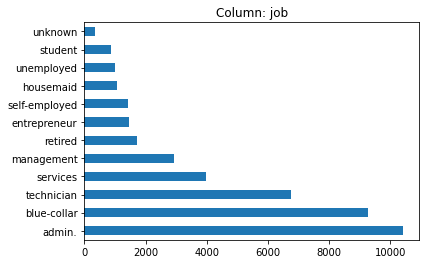

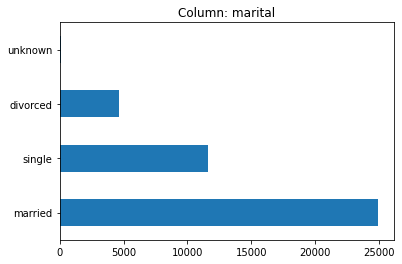

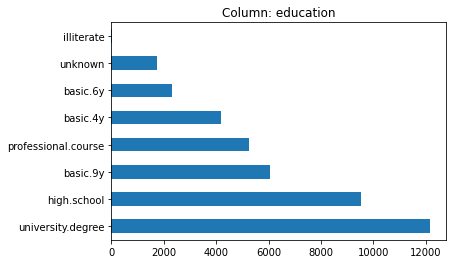

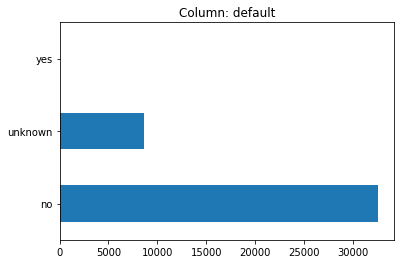

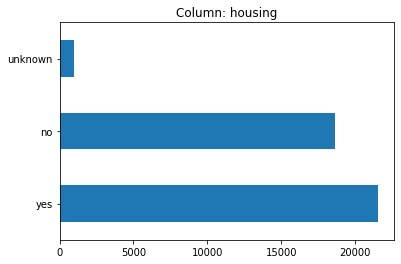

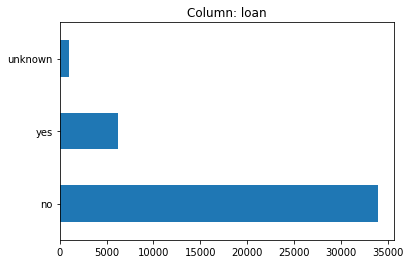

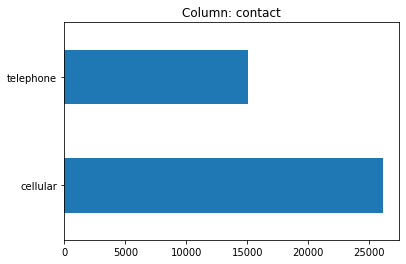

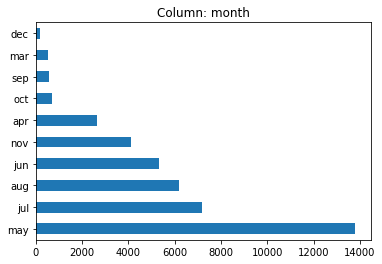

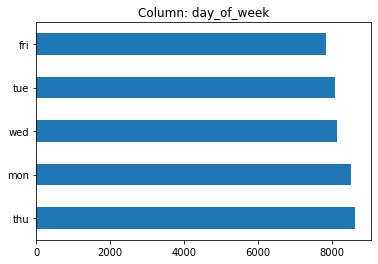

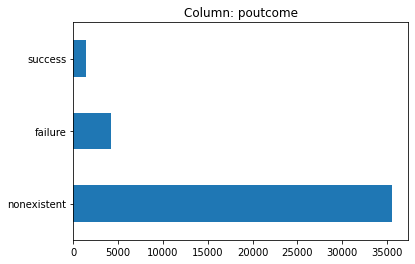

In [206]:
for idx, colname in enumerate(categs_df):
    plt.title('Column: ' + colname)
    (categs_df[colname]
        .value_counts()
        .head(30)
        .plot(kind='barh'))

    plt.show()

In [207]:
categs_df_ohe = pd.get_dummies(categs_df[categs_df.columns])
categs_df_ohe.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [208]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()

categs_df_ord = categs_df.copy(True)

for col in categs_df_ord.columns[:]:
    if categs_df_ord[col].dtype == "object":
        categs_df_ord[col] = ord_enc.fit_transform(categs_df_ord[[col]])
        
categs_df_ord.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,1.0
1,7.0,1.0,3.0,1.0,0.0,0.0,1.0,6.0,1.0,1.0
2,7.0,1.0,3.0,0.0,2.0,0.0,1.0,6.0,1.0,1.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6.0,1.0,1.0
4,7.0,1.0,3.0,0.0,0.0,2.0,1.0,6.0,1.0,1.0


In [209]:
quantit_df = df_copy_2[quantit]

In [210]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
std_scaler = StandardScaler()
std_scaler

# Normalize numeric attributes and assign it into a new dataframe
quantit_df_std = pd.DataFrame(std_scaler.fit_transform(quantit_df), columns=quantit)
quantit_df_std.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,-0.356309
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,-0.356309
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,-0.356309
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,-0.356309
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,-0.356309


In [211]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

quantit_df_nrm = pd.DataFrame(min_max_scaler.fit_transform(quantit_df), columns=quantit)
quantit_df_nrm.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.481481,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
1,0.493827,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
2,0.246914,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
3,0.283951,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
4,0.481481,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0


In [212]:
#choose conbination
# Get final df
final_df_2 = pd.concat([categs_df_ord,quantit_df_nrm], axis=1)

# Quick check
final_df_2.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,...,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,1.0,...,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
1,7.0,1.0,3.0,1.0,0.0,0.0,1.0,6.0,1.0,1.0,...,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
2,7.0,1.0,3.0,0.0,2.0,0.0,1.0,6.0,1.0,1.0,...,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6.0,1.0,1.0,...,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
4,7.0,1.0,3.0,0.0,0.0,2.0,1.0,6.0,1.0,1.0,...,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0


In [213]:
final_df_2.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,...,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,1.0,...,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
1,7.0,1.0,3.0,1.0,0.0,0.0,1.0,6.0,1.0,1.0,...,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
2,7.0,1.0,3.0,0.0,2.0,0.0,1.0,6.0,1.0,1.0,...,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6.0,1.0,1.0,...,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
4,7.0,1.0,3.0,0.0,0.0,2.0,1.0,6.0,1.0,1.0,...,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0


In [214]:
data2 = final_df_2.to_numpy()
print(data2)

[[3.         1.         0.         ... 0.95737928 0.85973535 0.        ]
 [7.         1.         3.         ... 0.95737928 0.85973535 0.        ]
 [7.         1.         3.         ... 0.95737928 0.85973535 0.        ]
 ...
 [5.         1.         6.         ... 0.08932215 0.         0.        ]
 [9.         1.         5.         ... 0.08932215 0.         1.        ]
 [5.         1.         5.         ... 0.08932215 0.         0.        ]]


In [180]:
# # Imputation
# imp = SimpleImputer(missing_values=np.nan, strategy='mean')
# imp.fit(data2)
# SimpleImputer()
# data_imp2 = imp.transform(data2)

In [181]:
# # check for null
# for ins in data_imp2:
#     for fea in ins:
#         if np.isnan(fea):
#             print('Nan value spotted')

# print(data_imp2.shape==data2.shape)
# print(data_imp2)

# Dataset 2 Training

In [215]:
size = data2.shape[0]
size20 = int(size * 0.2)
size40 = int(size * 0.4)
size60 = int(size * 0.6)
size80 = int(size * 0.8)
r = np.array([size20,size40,size60,size80])

In [216]:
acc, config, KNN_model = KNN_cross_validation(data2[:size20], 5, 10)
print('KNN: ', acc, config, KNN_model)
y_test = data2[size20:,-1].astype(int)
print(np.bincount(y_test))
pred = KNN_model.predict(data2[size20:,:-1])
acc = np.mean(pred == y_test)
print(acc)

KNN:  0.9587128111718276 2 KNeighborsClassifier(n_neighbors=2)
[28570  4381]
0.8671360504992262


In [217]:
train(data2, 20, 'KNN', r)

Size of Training Set:  8237
KNN:  0.9587128111718276 2 KNeighborsClassifier(n_neighbors=2)
0.8671360504992262
Size of Training Set:  16475
KNN:  0.9320182094081942 5 KNeighborsClassifier()
0.8408529923522033
Size of Training Set:  24712
KNN:  0.9415216511533792 5 KNeighborsClassifier()
0.7904224326292789
Size of Training Set:  32950
KNN:  0.8731411229135053 6 KNeighborsClassifier(n_neighbors=6)
0.6914299587278465


(0.8671360504992262, 2, KNeighborsClassifier(n_neighbors=2))

In [ ]:
train(data2, 15, 'DT', r)